<a href="https://colab.research.google.com/github/RashmiSunkara/Landslide-Identification/blob/main/AlexNet(New).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


Importing libraries

In [ ]:
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

Data Exploration and Preprocessing

In [ ]:
train_path='/content/drive/MyDrive/Colab Notebooks/Major Project/Dataset/Train'
test_path='/content/drive/MyDrive/Colab Notebooks/Major Project/Dataset/Test'

In [ ]:
input_size = (227, 227, 3)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)


train_data = train_datagen.flow_from_directory(train_path,
                                               target_size=input_size[:2],
                                               batch_size=32,
                                               subset = 'training')

val_data = train_datagen.flow_from_directory(train_path,
                                           target_size=input_size[:2],
                                           batch_size=32,
                                           subset = 'validation')
test_data = test_datagen.flow_from_directory(test_path,
                                               target_size=input_size[:2],
                                               batch_size=32)

Found 500 images belonging to 2 classes.
Found 124 images belonging to 2 classes.
Found 270 images belonging to 2 classes.


Building AlexNet Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Add the convolutional layers
model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(256, (5,5), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(384, (3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Add the fully-connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model with train data and validation data

In [ ]:
history=model.fit(train_data, epochs=30, validation_data=val_data)

Epoch 1/30
16/16 [==============================] - 64s 4s/step - loss: 0.4799 - accuracy: 0.8560 - val_loss: 0.4073 - val_accuracy: 0.8629
Epoch 2/30
16/16 [==============================] - 12s 735ms/step - loss: 0.3988 - accuracy: 0.8580 - val_loss: 0.4171 - val_accuracy: 0.8629
Epoch 3/30
16/16 [==============================] - 11s 664ms/step - loss: 0.3990 - accuracy: 0.8580 - val_loss: 0.4267 - val_accuracy: 0.8629
Epoch 4/30
16/16 [==============================] - 12s 717ms/step - loss: 0.3949 - accuracy: 0.8580 - val_loss: 0.4309 - val_accuracy: 0.8629
Epoch 5/30
16/16 [==============================] - 12s 731ms/step - loss: 0.3701 - accuracy: 0.8580 - val_loss: 0.4319 - val_accuracy: 0.8629
Epoch 6/30
16/16 [==============================] - 11s 724ms/step - loss: 0.3583 - accuracy: 0.8620 - val_loss: 0.4950 - val_accuracy: 0.8548
Epoch 7/30
16/16 [==============================] - 11s 711ms/step - loss: 0.3605 - accuracy: 0.8560 - val_loss: 0.4986 - val_accuracy: 0.8548
Ep

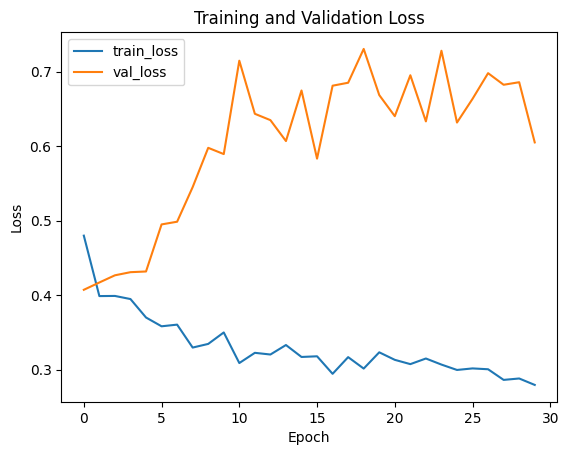

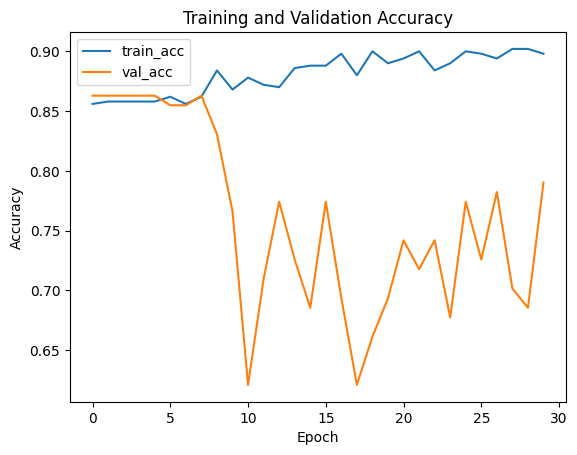

In [ ]:
import matplotlib.pyplot as plt
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Validation and Testing accuracy of the model

In [ ]:
loss_v, accuracy_v = model.evaluate(val_data, verbose=1)
loss_t, accuracy_t = model.evaluate(test_data, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy_t, loss_t))

9/9 [==============================] - 148s 18s/step - loss: 0.3373 - accuracy: 0.8815
Validation: accuracy = 0.798387  ;  loss_v = 0.616892
Test: accuracy = 0.881481  ;  loss = 0.337292


In [ ]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_data.classes

9/9 [==============================] - 4s 473ms/step


Evaluation Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
f1_score = f1_score(y_true_classes, y_pred_classes)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Precision: 0.8622047244094488
Recall: 0.948051948051948
F1-score: 0.9030927835051547


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

[[  4  35]
 [ 12 219]]


Saving the model

In [ ]:
import joblib
joblib.dump(model,'/content/drive/MyDrive/Colab Notebooks/Major Project/Saved Models/AlexNet(Newdatset).pkl')

['/content/drive/MyDrive/Colab Notebooks/Major Project/Saved Models/AlexNet(Newdatset).pkl']

Making Predictions

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Major Project/fyb1216.png')
x = image.img_to_array(img)
res = cv2.resize(x, dsize=(227, 227), interpolation=cv2.INTER_CUBIC)
x1 = np.expand_dims(res, axis=0)

1/1 [==============================] - 0s 324ms/step
Not Landslide


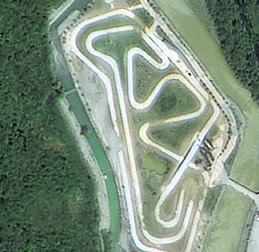

In [ ]:
pred = model.predict(x1)
predicted_class = np.argmax(pred)
if(predicted_class == 0):
  print('Landslide')
else:
  print('Not Landslide')
img

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Major Project/fyb1232.png')
x = image.img_to_array(img)
res = cv2.resize(x, dsize=(227, 227), interpolation=cv2.INTER_CUBIC)
x2 = np.expand_dims(res, axis=0)

1/1 [==============================] - 0s 21ms/step
Not Landslide


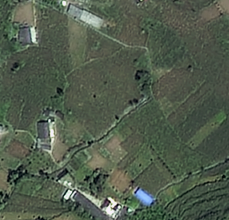

In [ ]:
pred = model.predict(x2)
predicted_class = np.argmax(pred)
if(predicted_class == 0):
  print('Landslide')
else:
  print('Not Landslide')
img

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Major Project/qxg051.png')
x = image.img_to_array(img)
res = cv2.resize(x, dsize=(227, 227), interpolation=cv2.INTER_CUBIC)
x3 = np.expand_dims(res, axis=0)

1/1 [==============================] - 0s 18ms/step
Not Landslide


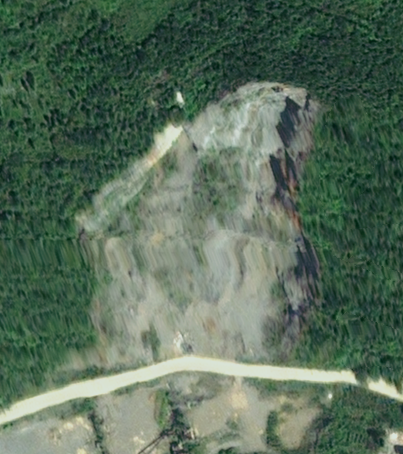

In [ ]:
pred = model.predict(x3)
predicted_class = np.argmax(pred)
if(predicted_class == 0):
  print('Landslide')
else:
  print('Not Landslide')
img

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Major Project/qxg061.png')
x = image.img_to_array(img)
res = cv2.resize(x, dsize=(227, 227), interpolation=cv2.INTER_CUBIC)
x4 = np.expand_dims(res, axis=0)

1/1 [==============================] - 0s 20ms/step
Not Landslide


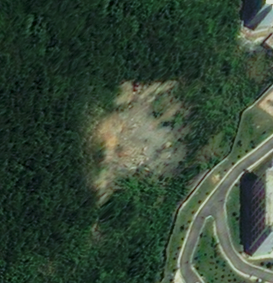

In [ ]:
pred = model.predict(x4)
predicted_class = np.argmax(pred)
if(predicted_class == 0):
  print('Landslide')
else:
  print('Not Landslide')
img